In [63]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import root
# import matplotlib.pyplot as plt
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

# # Parameters
# c = 1.0

# def update(alpha = 0.33, delta = 0.00, n = 0.04, g = 0.04):
#     # Production function per effective labor
#     def f(k):
#         return k**alpha

#     # The equation to find the root
#     def equation(k):
#         return k**alpha - (n + g + delta) * k - c

#     plt.clf()
#     # Find the root for the k value where dot{k} = 0
#     k_initial_guess = 1.0
#     solution = root(equation, k_initial_guess)
#     k_solution = solution.x[0]

#     # Generate a grid of k values
#     k_vals = np.linspace(0, 40, 100)

#     # Find the values of c that satisfy the dot{k} = 0 and dot{c} = 0 equations
#     c_for_c_dot_0 = (df(k_vals) - rho - theta * g) * theta
#     c_dotk_0 = f(k_vals) - (n + g + delta) * k_vals

#     # Plot the phase diagram
#     plt.plot(k_vals, c_dotk_0, label='$\\dot{k} = 0$')
#     plt.axvline(x=k_solution, color='red', linestyle='--', label='Solution for $k$')
#     plt.legend()
#     plt.grid()
#     plt.xlim(0, 30)  # This sets the left bound of the x-axis to 0
#     plt.ylim(0, 2)  # This sets the lower bound of the y-axis to 0
#     plt.xlabel('k (capital per effective labor)')
#     plt.ylabel('c (consumption per effective labor)')
#     plt.title('Phase Diagram')

# interact(update,
#          alpha=widgets.FloatSlider(min=0, max=1, step=.01, value=1/3, description=' Alpha:'),
#          g=widgets.FloatSlider(min=0, max=1, step=.005, value=.03, description='Growth rate (g):'),
#          n=widgets.FloatSlider(min=0, max=1, step=.005, value=.03, description='Population growth rate (n):'),
#          c=widgets.FloatSlider(min=0, max=1, step=.005, value=1.0, description='Consumption (c):'),
#          delta=widgets.FloatSlider(min=0, max=1, step=.005, value=.04, description='Depreciation rate (delta):'),
# )


# def update(alpha=0.33, rho=0.03, theta=2.0, delta=0.04, n=0.04, g=0.04):
#     # Production function per effective labor
#     def f(k):
#         return k**alpha

#     # Derivative of the production function
#     def df(k):
#         return alpha * k**(alpha - 1)

#     # \dot{c}/c
#     def c_dot_over_c(k, c):
#         return (df(k) - rho - theta * g) / theta

#     # \dot{k}
#     def k_dot(k, c):
#         return f(k) - c - (n + g) * k

#     k_vals = np.linspace(0, 40, 100)
#     c_vals = np.linspace(0, 2, 100)

#     # Lines where \dot{c} = 0 and \dot{k} = 0
#     c_for_c_dot_0 = (df(k_vals) - rho - theta * g) * theta
#     k_for_k_dot_0 = f(k_vals) / (n + g + delta)

#     K, C = np.meshgrid(k_vals, c_vals)
#     Kdot = k_dot(K, C)
#     Cdot = c_dot_over_c(K, C) * C

#     plt.clf()
#     plt.streamplot(K, C, Kdot, Cdot, density=1.5, color="k", linewidth=0.5)
    
#     # Plotting the \dot{c} = 0 and \dot{k} = 0 lines
#     plt.plot(k_vals, c_for_c_dot_0, 'b-', label='$\\dot{c} = 0$')
#     plt.axhline(0, color='r', linestyle='--', label='$\\dot{k} = 0$')




import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Parameters
c_initial = 1.0

def update(alpha=0.33, rho=0.03, theta=1.0, delta=0.04, n=0.04, g=0.04):
    # Production function per effective labor
    def f(k):
        return k**alpha

    # Derivative of the production function
    def df(k):
        return np.where(k > 0, alpha * k**(alpha - 1), 0) 

    # \dot{c}/c
    def c_dot_over_c(k):
        return (df(k) - rho - theta * g) / theta

    # \dot{k}
    def k_dot(k, c):
        return f(k) - c - (n + g) * k

    k_vals = np.linspace(0.01, 39.5, 300)
    c_vals = np.linspace(0.01, 2, 300)

    K, C = np.meshgrid(k_vals, c_vals)
    Kdot = k_dot(K, C)
    Cdot = c_dot_over_c(K) * C

    c_dotk_0 = f(k_vals) - (n + g + delta) * k_vals

    k_initial_guess = 1.0
    solution = root(c_dot_over_c, k_initial_guess)
    c_solution = solution.x[0]

    plt.clf()
    # Plot the phase diagram
    plt.plot(k_vals, c_dotk_0, label='$\\dot{k} = 0$')
    plt.axvline(x=c_solution, color='red', linestyle='--', label='$\dot{c}$ = 0 ($\dot{k}$=' + '{0:.4})'.format(c_solution))
    plt.streamplot(K, C, Kdot, Cdot, density=1.5, color="lightgrey", linewidth=0.5)
    plt.xlabel('k (capital per effective labor)')
    plt.ylabel('c (consumption per effective labor)')
    plt.title('Phase Diagram')
    plt.grid()
    plt.xlim(0, 40)
    plt.ylim(0, 1.5)
    plt.legend()

interact(update,
         alpha=widgets.FloatSlider(min=0, max=1, step=.01, value=1/3, description='Alpha:'),
         rho=widgets.FloatSlider(min=0, max=1, step=.005, value=0.03, description='Rho:'),
         theta=widgets.FloatSlider(min=0, max=1, step=.05, value=.5, description='Theta:'),
         delta=widgets.FloatSlider(min=0, max=1, step=.005, value=.04, description='Depreciation rate (delta):'),
         n=widgets.FloatSlider(min=0, max=1, step=.005, value=.04, description='Population growth rate (n):'),
         g=widgets.FloatSlider(min=0, max=1, step=.005, value=.04, description='Growth rate (g):'),
)



interactive(children=(FloatSlider(value=0.3333333333333333, description='Alpha:', max=1.0, step=0.01), FloatSl…

<function __main__.update(alpha=0.33, rho=0.03, theta=1.0, delta=0.04, n=0.04, g=0.04)>

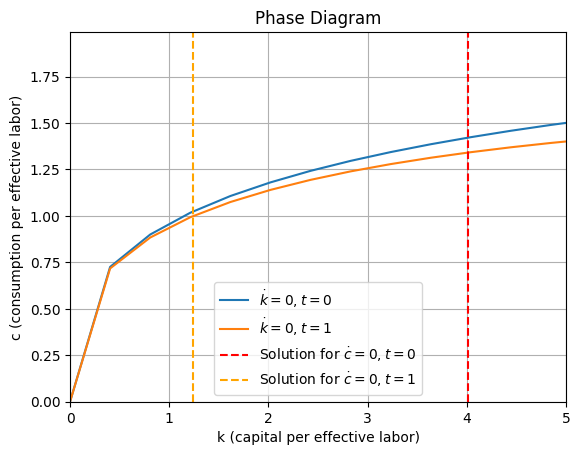

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# Parameters
alpha = 0.33
rho = 0.05
theta = 4.0
delta = 0.00
n = 0.02
g = 0.02
c = 1.0

# Production function per effective labor
def f(k):
    return k**alpha

def f_prime(k):
    return alpha * k**(alpha - 1)

# The equation to find the root
def equation(k):
    return k**alpha - (n + g + delta) * k - c

# The equation to find the root
def equation_c(k):
    return (f_prime(k) - rho - theta * g)/theta

# Find the root for the k value where dot{k} = 0
c_initial_guess = 1.0
solution = root(equation_c, c_initial_guess)
c_solution = solution.x[0]

# Generate a grid of k values
k_vals = np.linspace(0, 40, 100)

# Find the values of c that satisfy the dot{k} = 0 and dot{c} = 0 equations
c_dotk_0 = f(k_vals) - (n + g + delta) * k_vals

# Find solutions for new parameters
g = .04
solution = root(equation, k_initial_guess)
k_line_solution = solution.x[0]
c_dotk_1 = f(k_vals) - (n + g + delta) * k_vals

# Plot the phase diagram
plt.plot(k_vals, c_dotk_0, label='$\\dot{k} = 0, t = 0$')
plt.plot(k_vals, c_dotk_1, label='$\\dot{k} = 0, t = 1$')
plt.axvline(x=c_solution, color='red', linestyle='--', label='Solution for $\dot{c}=0, t=0$')
plt.axvline(x=k_line_solution, color='orange', linestyle='--', label='Solution for $\dot{c}=0, t=1$')

# Reframing the chart to focus on the intersection
plt.xlim(left=0, right=5)
plt.ylim(bottom=0)

plt.xlabel('k (capital per effective labor)')
plt.ylabel('c (consumption per effective labor)')
plt.title('Phase Diagram')
plt.legend()
plt.grid()
plt.show()
